<a href="https://colab.research.google.com/github/palayushi293/GAN_Avatar/blob/main/Internship_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.6 which is incompatible.


In [ ]:
!pip uninstall mediapipe -y
!pip install --no-cache-dir mediapipe
import os
os._exit(0)

Found existing installation: mediapipe 0.10.21
Uninstalling mediapipe-0.10.21:
  Successfully uninstalled mediapipe-0.10.21
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 73.1 MB/s eta 0:00:00


In [1]:
import cv2
import numpy as np
import mediapipe as mp

In [3]:
from IPython.display import display, Javascript
#for cature my image
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

def take_photo(filename='photo.jpg'):
    js = Javascript('''
        async function takePhoto() {
            const div = document.createElement('div');
            document.body.appendChild(div);
            const video = document.createElement('video');
            div.appendChild(video);


            const stream = await navigator.mediaDevices.getUserMedia({ video: true });
            video.srcObject = stream;
            await new Promise((resolve) => (video.onloadedmetadata = resolve));
            video.play();


            await new Promise((resolve) => setTimeout(resolve, 1000));
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach((track) => track.stop());

            const dataUrl = canvas.toDataURL('image/jpeg');
            div.remove();
            return dataUrl;
        }
        takePhoto();
    ''')

    display(js)
    data = eval_js("takePhoto()")
    binary = b64decode(data.split(',')[1])
    with open(filename, "wb") as f:
        f.write(binary)
    print(f"📸 Image saved as {filename}")


take_photo("captured_image.jpg")


<IPython.core.display.Javascript object>

📸 Image saved as captured_image.jpg


In [4]:
import cv2
import mediapipe as mp

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils


image_path = "captured_image.jpg"
image = cv2.imread(image_path)

if image is None:
    print("Error")
else:

    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        results = face_detection.process(rgb_image)


        if results.detections:
            for detection in results.detections:
                mp_drawing.draw_detection(image, detection)

        cv2.imwrite("detected_faces.jpg", image)
        print(" Face detection complete! Image saved as detected_faces.jpg")


 Face detection complete! Image saved as detected_faces.jpg


In [5]:
from google.colab import files
files.download("detected_faces.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
!pip install diffusers transformers accelerate safetensors
!pip install git+https://github.com/h94/IP-Adapter.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

  Cloning https://github.com/h94/IP-Adapter.git to /tmp/pip-req-build-cayz5i97
  Running command git clone --filter=blob:none --quiet https://github.com/h94/IP-Adapter.git /tmp/pip-req-build-cayz5i97
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/h94/IP-Adapter.git /tmp/pip-req-build-cayz5i97 did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/h94/IP-Adapter.git /tmp/pip-req-build-cayz5i97 did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [7]:
! pip install --upgrade diffusers


✅ Face successfully extracted & saved as 'cropped_face.jpg'!


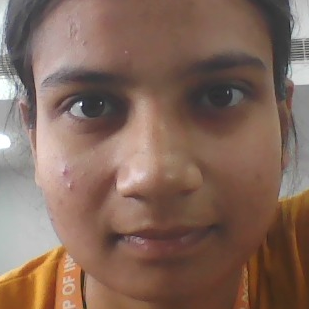

In [8]:
import cv2
#cropping

import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils


image_path = "captured_image.jpg"
image = cv2.imread(image_path)

if image is None:
    print("⚠️ Error: Image not found! Make sure the webcam captured an image.")
else:
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        results = face_detection.process(rgb_image)

        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                h, w, c = image.shape


                x, y, w_box, h_box = (int(bboxC.xmin * w), int(bboxC.ymin * h),
                                      int(bboxC.width * w), int(bboxC.height * h))


                face_crop = image[y:y + h_box, x:x + w_box]


                if face_crop.size > 0:
                    cv2.imwrite("cropped_face.jpg", face_crop)
                    print("✅ Face successfully extracted & saved as 'cropped_face.jpg'!")


                    cv2_imshow(face_crop)
                else:
                    print("⚠️ No face detected. Try taking another photo.")

        else:
            print("⚠️ No faces detected. Try again with better lighting.")


In [22]:
import os
print(os.path.exists("/content/cropped_face.jpg"))  # Should return True if file exists


True


In [23]:
!pip install opencv-python dlib numpy


In [53]:
import cv2
import numpy as np
import mediapipe as mp

def extract_face_sticker(image_path, output_path="face_sticker.png"):
    """Extracts the face as a sticker with a transparent background."""
    # Load image
    image = cv2.imread(image_path)
    h, w, _ = image.shape

    # Initialize MediaPipe Face Detection
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, refine_landmarks=True)


    rgb_image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)


    results = face_mesh.process(rgb_image)

    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]


        mask = np.zeros((h, w), dtype=np.uint8)


        points = [(int(landmark.x * w), int(landmark.y * h)) for landmark in face_landmarks.landmark]


        face_contour = [10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 397, 365, 379, 378, 400,
                        377, 152, 148, 176, 149, 150, 136, 172, 58, 132, 93, 234, 127, 162, 21, 54, 103, 67, 109]


        face_points = np.array([points[i] for i in face_contour], np.int32)


        cv2.fillPoly(mask, [face_points], 255)


        mask_3ch = cv2.merge([mask, mask, mask])


        face_cutout = cv2.bitwise_and(image, mask_3ch)


        b, g, r = cv2.split(face_cutout)
        alpha = mask
        sticker = cv2.merge([b, g, r, alpha])

        cv2.imwrite(output_path, sticker)
        print(f"✅ Face sticker saved as {output_path}")

    else:
        print("❌ No face detected!")


extract_face_sticker("/content/cropped_face.jpg", "/content/face_sticker.png")


✅ Face sticker saved as /content/face_sticker.png


In [28]:
!pip install diffusers transformers accelerate opencv-python pillow
!pip install git+https://github.com/TencentARC/T2I-Adapter.git

from diffusers import StableDiffusionPipeline


  Cloning https://github.com/TencentARC/T2I-Adapter.git to /tmp/pip-req-build-azlbdf1d
  Running command git clone --filter=blob:none --quiet https://github.com/TencentARC/T2I-Adapter.git /tmp/pip-req-build-azlbdf1d
  Resolved https://github.com/TencentARC/T2I-Adapter.git to commit c408b059c36e3f9ce336b66746bd606edaa5483a
ERROR: git+https://github.com/TencentARC/T2I-Adapter.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [29]:
! pip install diffusers transformers accelerate opencv-python pillow
! pip install git+https://github.com/h94/IP-Adapter.git


  Cloning https://github.com/h94/IP-Adapter.git to /tmp/pip-req-build-hcxx1s2r
  Running command git clone --filter=blob:none --quiet https://github.com/h94/IP-Adapter.git /tmp/pip-req-build-hcxx1s2r
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/h94/IP-Adapter.git /tmp/pip-req-build-hcxx1s2r did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/h94/IP-Adapter.git /tmp/pip-req-build-hcxx1s2r did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [30]:
!pip install git+https://github.com/camenduru/IP-Adapter.git



  Cloning https://github.com/camenduru/IP-Adapter.git to /tmp/pip-req-build-2dkulxlb
  Running command git clone --filter=blob:none --quiet https://github.com/camenduru/IP-Adapter.git /tmp/pip-req-build-2dkulxlb
  Resolved https://github.com/camenduru/IP-Adapter.git to commit e317f750e1829e846c944b9fdd7a2f2842c46501
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ip-adapter: filename=ip_adapter-0.1.0-py3-none-any.whl size=21736 sha256=c34224ead706262e3460cd7849a95dd563aad4de551043e3457a0700e6224b70
  Stored in directory: /tmp/pip-ephem-wheel-cache-lx3n5q6p/wheels/2b/ce/2f/891b3a256858b48f650b7d0f7946cce1769e9bcafd3d88c3bb
Successfully built ip-adapter


In [31]:
import torch
from PIL import Image
from diffusers import StableDiffusionPipeline
from ip_adapter import IPAdapter
from google.colab import files


In [ ]:
face_image_path = "cropped_face.jpg"
face_image = Image.open(face_image_path)  # Ensure the image exists



In [32]:
! pip install git+https://github.com/camenduru/IP-Adapter.git

  Cloning https://github.com/camenduru/IP-Adapter.git to /tmp/pip-req-build-zyycasn_
  Running command git clone --filter=blob:none --quiet https://github.com/camenduru/IP-Adapter.git /tmp/pip-req-build-zyycasn_
  Resolved https://github.com/camenduru/IP-Adapter.git to commit e317f750e1829e846c944b9fdd7a2f2842c46501
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [33]:
!pip install diffusers transformers accelerate opencv-python pillow
!pip install git+https://github.com/camenduru/IP-Adapter.git


  Cloning https://github.com/camenduru/IP-Adapter.git to /tmp/pip-req-build-f7odcs4_
  Running command git clone --filter=blob:none --quiet https://github.com/camenduru/IP-Adapter.git /tmp/pip-req-build-f7odcs4_
  Resolved https://github.com/camenduru/IP-Adapter.git to commit e317f750e1829e846c944b9fdd7a2f2842c46501
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [35]:
import torch
from PIL import Image
from diffusers import StableDiffusionPipeline
from ip_adapter import IPAdapter


In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5" ,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
).to(device)



Using device: cuda


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [37]:
import torch
from PIL import Image
from diffusers import StableDiffusionPipeline
from ip_adapter import IPAdapter

def load_models():
    """Loads Stable Diffusion and IP-Adapter models."""
    device = "cuda" if torch.cuda.is_available() else "cpu"


    pipe = StableDiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
    ).to(device)


    ip_ckpt_path = "h94/IP-Adapter/model.pth"
    ip_adapter = IPAdapter(pipe, ip_ckpt=ip_ckpt_path, device=device)

    return pipe, ip_adapter, device


In [38]:
import torch
from PIL import Image
from diffusers import StableDiffusionPipeline
from ip_adapter import IPAdapter

def load_models():
    """Loads Stable Diffusion and IP-Adapter models."""
    device = "cuda" if torch.cuda.is_available() else "cpu"


    pipe = StableDiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
    ).to(device)


    ip_ckpt_path = "h94/IP-Adapter/model.pth"
    ip_adapter = IPAdapter(pipe=pipe, ip_ckpt=ip_ckpt_path, device=device)

    return pipe, ip_adapter, device


In [42]:
! pip install roop
! pip install onnxruntime


ERROR: Could not find a version that satisfies the requirement roop (from versions: none)
ERROR: No matching distribution found for roop
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.7 MB/s eta 0:00:00


In [49]:
import torch
from diffusers import StableDiffusionPipeline

def generate_avatar(prompt, output_path="lady.png", seed=42):
    """Generates an avatar based on a text prompt using Stable Diffusion."""

    device = "cuda" if torch.cuda.is_available() else "cpu"

    pipe = StableDiffusionPipeline.from_pretrained(
        "runwayml/stable-diffusion-v1-5",
        torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
    ).to(device)


    generator = torch.manual_seed(seed)

    print(" Generating Avatar...")


    avatar = pipe(prompt, guidance_scale=7.5, generator=generator).images[0]

    avatar.show()
    avatar.save(output_path)

    print(f" Avatar saved at: {output_path}")
    return output_path

generate_avatar("Generate a detailed digital portrait of an astronaut without a helmet, wearing a futuristic space suit")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

 Generating Avatar...


  0%|          | 0/50 [00:00<?, ?it/s]

 Avatar saved at: lady.png


'lady.png'

In [ ]:
!python -m roop -s "/content/cropped_face.jpg" -t "/content/lady.png" -o "/content/output.jpg"


/usr/bin/python3: No module named roop


In [ ]:
pip show roop

In [ ]:
! python --version

Python 3.11.11


In [43]:
! pip install DeepFace

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=4ccdc2d610cb1975d94894eab17623919a0f5578740319cba747bd6fce6bc583
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [58]:


## best for face swapping pehla niche jao
import cv2
import numpy as np
from deepface import DeepFace

def detect_face(image_path):
    """Detects and crops face from an image."""
    image = cv2.imread(image_path)
    faces = DeepFace.detectFace(image_path, detector_backend='opencv')

    if faces is not None:
        x, y, w, h = 50, 50, image.shape[1]-100, image.shape[0]-100
        cropped_face = image[y:y+h, x:x+w]
        return cropped_face
    else:
        print("No face detected!")
        return None

def swap_faces(source_path, target_path, output_path="output.jpg"):
    """Swaps face from source to target using Poisson blending."""
    src_face = detect_face(source_path)
    target_img = cv2.imread(target_path)

    if src_face is None:
        print("Source face not detected!")
        return


    src_face = cv2.resize(src_face, (200, 200))

    x_offset, y_offset = 100, 100
    x_end, y_end = x_offset + src_face.shape[1], y_offset + src_face.shape[0]


    mask = 255 * np.ones(src_face.shape, src_face.dtype)


    center = (x_offset + src_face.shape[1]//2, y_offset + src_face.shape[0]//2)
    blended = cv2.seamlessClone(src_face, target_img, mask, center, cv2.NORMAL_CLONE)

    cv2.imwrite(output_path, blended)
    print(f"Face swapped image saved as {output_path}")


swap_faces("/content/resized_face.jpg", "/content/lady.png", "/content/face_swapped_output.jpg")


25-03-25 06:33:36 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
Face swapped image saved as /content/face_swapped_output.jpg


In [73]:
import cv2
import numpy as np
#####yee aaj wlala mai badiya  upr wala mera na face sticker mai nhi chal rha tha toh
def blend_faces(source_face_path, target_face_path, output_path):
    """Blends the source face onto the target face using Poisson blending."""


    source_face = cv2.imread(source_face_path)
    target_face = cv2.imread(target_face_path)

    if source_face is None or target_face is None:
        print("Error: One of the images could not be loaded. Check file paths!")
        return


    target_h, target_w = target_face.shape[:2]
    source_face = cv2.resize(source_face, (target_w // 2, target_h // 2))

    mask = 255 * np.ones(source_face.shape, source_face.dtype)


    x_offset = ((target_w - source_face.shape[1]) // 2)+90
    y_offset = ((target_h - source_face.shape[0]) // 2)-90
    center = (x_offset + source_face.shape[1] // 2, y_offset + source_face.shape[0] // 2)


    blended = cv2.seamlessClone(source_face, target_face, mask, center, cv2.NORMAL_CLONE)


    cv2.imwrite(output_path, blended)
    print(f"Face blended successfully! Saved at {output_path}")

blend_faces("/content/face_sticker.png", "/content/lady.png", "/content/face_swapped_output.jpg")


Face blended successfully! Saved at /content/face_swapped_output.jpg


In [44]:
!pip install gfpgan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 24.2 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214818 sha256=769960701390b77610d3d7cfa07bf90271b46962825c6b7d93f87dd02290fb25
  Stored in directory: /root/.cache/pip/wheels/6d/a4/b3/9f888ba88efcae6dd4bbce69832363de9c4051142674f779fa
  Created wheel fo

In [45]:
!pip install torch torchvision


In [46]:
!pip install facenet-pytorch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 561.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 642.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 392.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [50]:

## wizard ki face nikalo

#from avatar
import cv2
import torch
from PIL import Image
from facenet_pytorch import MTCNN

def detect_and_crop_face(image_path, output_path="/content/wizard_face.jpg"):

    image = Image.open(image_path)

    # Initialize MTCNN face detector
    mtcnn = MTCNN(keep_all=False, device="cuda" if torch.cuda.is_available() else "cpu")

    # Detect face
    boxes, _ = mtcnn.detect(image)

    if boxes is not None:
        # Bouding
        x, y, x2, y2 = map(int, boxes[0])

        face_crop = image.crop((x, y, x2, y2))


        face_crop.save(output_path)

        print(f" Face cropped and saved at: {output_path}")
        face_crop.show()
    else:
        print(" No face detected in the avatar!")


detect_and_crop_face("/content/lady.png")


✅ Face cropped and saved at: /content/wizard_face.jpg


In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2


--2025-03-22 18:52:24--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-03-22 18:52:24--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  13.9MB/s    in 5.3s    

2025-03-22 18:52:30 (11.6 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
import cv2
import numpy as np
#####useless
def blend_faces(foreground_path, background_path, mask_path, output_path="/content/blended_face.jpg"):
    """
    Uses Poisson blending to naturally merge the face into the avatar body.
    """

    foreground = cv2.imread(foreground_path)
    background = cv2.imread(background_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  g


    height, width, _ = foreground.shape
    center = (width // 2 + 180, height // 2+20)


    blended = cv2.seamlessClone(foreground, background, mask, center, cv2.NORMAL_CLONE)


    cv2.imwrite(output_path, blended)
    return output_path


blend_faces("/content/resized_wider_face.jpg", "/content/lady.png", "/content/face_mask.jpg")


'/content/blended_face.jpg'

In [55]:
import cv2
import numpy as np

def resize_face_to_avatar(your_face_path, avatar_face_path, output_path="resized_face.jpg"):
    """Resizes your face to match the dimensions of the avatar face."""
## yee eek dam badiya mera crop face ko avatar crop face ka jaise resize karega

    your_face = cv2.imread(your_face_path)
    avatar_face = cv2.imread(avatar_face_path)


    if your_face is None or avatar_face is None:
        raise ValueError("⚠️ One or both images could not be loaded. Check file paths.")


    height_avatar, width_avatar, _ = avatar_face.shape


    resized_face = cv2.resize(your_face, (width_avatar, height_avatar))


    cv2.imwrite(output_path, resized_face)

    print(f" Resized face saved at: {output_path}")
    return output_path

resize_face_to_avatar("/content/face_sticker.png", "/content/face_sticker_avatar.png")


✅ Resized face saved at: resized_face.jpg


'resized_face.jpg'

In [ ]:
import cv2
#######useless
def resize_width_with_adjusted_height(image_path, output_path, new_width, height_reduction_factor=0.95):
    # Load image
    image = cv2.imread(image_path)
    height, width = image.shape[:2]


    aspect_ratio = height / width
    new_height = int(new_width * aspect_ratio * height_reduction_factor)


    resized_image = cv2.resize(image, (new_width, new_height))


    cv2.imwrite(output_path, resized_image)
    return output_path


resize_width_with_adjusted_height("/content/resized_face.jpg", "/content/resized_wider_face.jpg", new_width=270)


'/content/resized_wider_face.jpg'

In [52]:
import cv2
import numpy as np
import mediapipe as mp
###### ye avatar ka face ko sticker form
def extract_face_sticker(image_path, output_path="face_sticker.png"):
    """Extracts the face as a sticker with a transparent background."""

    image = cv2.imread(image_path)
    h, w, _ = image.shape


    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, refine_landmarks=True)

    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    results = face_mesh.process(rgb_image)

    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]


        mask = np.zeros((h, w), dtype=np.uint8)


        points = [(int(landmark.x * w), int(landmark.y * h)) for landmark in face_landmarks.landmark]


        face_contour = [10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 397, 365, 379, 378, 400,
                        377, 152, 148, 176, 149, 150, 136, 172, 58, 132, 93, 234, 127, 162, 21, 54, 103, 67, 109]


        face_points = np.array([points[i] for i in face_contour], np.int32)


        cv2.fillPoly(mask, [face_points], 255)


        mask_3ch = cv2.merge([mask, mask, mask])


        face_cutout = cv2.bitwise_and(image, mask_3ch)


        b, g, r = cv2.split(face_cutout)
        alpha = mask
        sticker = cv2.merge([b, g, r, alpha])


        cv2.imwrite(output_path, sticker)
        print(f" Face sticker saved as {output_path}")

    else:
        print(" No face detected!")

# Example usage
extract_face_sticker("/content/wizard_face.jpg", "/content/face_sticker_avatar.png")


✅ Face sticker saved as /content/face_sticker_avatar.png


In [ ]:
! pip install torch torchvision numpy scipy pillow tqdm requests


In [ ]:
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl


--2025-03-22 04:38:56--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 13.35.202.117, 13.35.202.62, 13.35.202.74, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|13.35.202.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381646055 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.97M  20.6MB/s    in 19s     

2025-03-22 04:39:16 (18.8 MB/s) - ‘ffhq.pkl’ saved [381646055/381646055]



In [ ]:
! pip install git+https://github.com/NVlabs/stylegan2-ada-pytorch.git


  Cloning https://github.com/NVlabs/stylegan2-ada-pytorch.git to /tmp/pip-req-build-_p31nbrh
  Running command git clone --filter=blob:none --quiet https://github.com/NVlabs/stylegan2-ada-pytorch.git /tmp/pip-req-build-_p31nbrh
  Resolved https://github.com/NVlabs/stylegan2-ada-pytorch.git to commit d72cc7d041b42ec8e806021a205ed9349f87c6a4
ERROR: git+https://github.com/NVlabs/stylegan2-ada-pytorch.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
! python generate.py --network=stylegan2-ffhq-config-f.pkl --seeds=66,230,389,1518 --truncation-psi=1.0


python3: can't open file '/content/generate.py': [Errno 2] No such file or directory


In [ ]:
#### face swapping

In [ ]:
import cv2
import numpy as np
## face swap best
def swap_resized_face(resized_face_path, avatar_body_path, output_path="swapped_avatar.jpg"):
    """Swaps the already resized face onto the avatar's body using Poisson blending."""
    resized_face = cv2.imread(resized_face_path)
    avatar_body = cv2.imread(avatar_body_path)


    avatar_h, avatar_w, _ = avatar_body.shape
    face_h, face_w, _ = resized_face.shape


    x_offset = ((avatar_w - face_w) // 2)-55
    y_offset = (((avatar_h - face_h) // 3)) -7

    center = (x_offset + face_w // 2, y_offset + face_h // 2)

    mask = 255 * np.ones(resized_face.shape, resized_face.dtype)


    blended = cv2.seamlessClone(resized_face, avatar_body, mask, center, cv2.NORMAL_CLONE)

    cv2.imwrite(output_path, blended)
    print(f" Face swapped image saved as {output_path}")

# Example Usage
swap_resized_face("/content/resized_face.jpg", "/content/wizard.png", "/content/wizard_new.png")


✅ Face swapped image saved as /content/wizard_new.png
